# Simplified three plate column

In [5]:
import numpy
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import scipy.optimize
import scipy.integrate

In [70]:

α = 1.5
F = 10
xf_1 = 0.5
D = 0.5*F
reflux = 0.5
B = F-D

init = [0.5,0.5,0.5,0.5,0.5,0.5] # initial conditions

# M_star = 0.1 # nominal holdup 
# τ = 5
# Ltop = 0.3
# Lbot = 0.4

In [71]:
def model(t,var):
    
    xc_1,x1_1,x2_1,x3_1,xr_1,xt_1 = var
    
    xd_1 = xc_1
    xb_1 = xr_1
    
    xf_2 = 1 - xf_1
    xb_2 = 1 - xb_1
    xd_2 = 1 - xd_1
    
    xc_2 = 1 - xc_1
    x1_2 = 1 - x1_1
    x2_2 = 1 - x2_1
    x3_2 = 1 - x3_1
    xr_2 = 1 - xr_1
    
    y1_1 = α*x1_1/(1 + (α-1)*x1_1)
    y2_1 = α*x2_1/(1 + (α-1)*x2_1)
    y3_1 = α*x3_1/(1 + (α-1)*x3_1)
    y4_1 = α*xb_1/(1 + (α-1)*xb_1)
    
    y1_2 = 1 - y1_1
    y2_2 = 1 - y2_1
    y3_2 = 1 - y3_1
    y4_2 = 1 - y4_1 
    
    L0 = reflux*D
    L1 = L0
    L2 = L1 + F
    L3 = L1 + F
    
    V1 = F
    V2 = F
    V3 = F
    V4 = F
    
    dMcxc_1dt = (V1*y1_1 - xc_1*L0 - xd_1*D)
    dMcxc_2dt = (V1*y1_2 - xc_2*L0 - xd_2*D)
    
    dM1x1_1dt = V2*y2_1 - V1*y1_1 + L0*xc_1 - L1*x1_1
    dM1x1_2dt = V2*y2_2 - V1*y1_2 + L0*xc_2 - L1*x1_2
    
    dM2x2_1dt = V3*y3_1 - V2*y2_1 + L1*x1_1 - L2*x2_1 + F*xf_1
    dM2x2_2dt = V3*y3_2 - V2*y2_2 + L1*x1_2 - L2*x2_2 + F*xf_2
    
    dM3x3_1dt = V4*y4_1 - V3*y3_1 + L2*x2_1 - L3*x3_1
    dM3x3_2dt = V4*y4_2 - V3*y3_2 + L2*x2_2 - L3*x3_2
    
    dMrxr_1dt = (L3*x3_1 - V4*y4_1 - B*xb_1)
    dMrxr_2dt = (L3*x3_2 - V4*y4_2 - B*xb_2)
    
    dMtxt_1dt = F*xf_1 - (B*xb_1 + D*xd_1)
    dMtxt_2dt = F*xf_2 - (B*xb_2 + D*xd_2)
   
    xc_1 = dMcxc_1dt/(dMcxc_1dt + dMcxc_2dt)
    x1_1 = dM1x1_1dt/(dM1x1_1dt + dM1x1_2dt)
    x2_1 = dM2x2_1dt/(dM2x2_1dt + dM2x2_2dt)
    x3_1 = dM3x3_1dt/(dM3x3_1dt + dM3x3_2dt)
    xr_1 = dMrxr_1dt/(dMrxr_1dt + dMrxr_2dt)
    xt_1 = dMtxt_1dt/(dMtxt_1dt + dMtxt_2dt)
    
    return [xc_1,x1_1,x2_1,x3_1,xr_1,xt_1]

In [72]:
tspan = (0, 100)
t = numpy.linspace( *tspan, 100)
initial_run = scipy.integrate.solve_ivp(model, tspan, init, t_eval=t)

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [45]:
xc,x1,x2,x3,xr,xt,M1,M2,M3,Mt,B = initial_run.y

NameError: name 'initial_run' is not defined

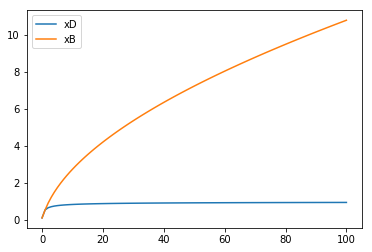

In [182]:
plt.plot(t,xc,label = "xD")
plt.plot(t,xr,label = "xB")
plt.legend()

50.0


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

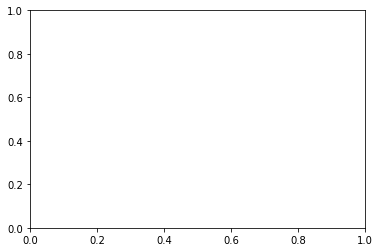

In [188]:
accum = numpy.trapz(F-(D+B),t)
print(accum)
accum1 = (xc*Mc+x1*M1+x2*M2+x3*M3+xr*Mr)
plt.plot(t,accum,label = "mass balance")
plt.plot(t,accum1,label = "accumulation")
plt.legend()


In [ ]:
def model(t,var):
    
    xc_1,x1_1,x2_1,x3_1,xr_1,xt_1 = var
    
    xd_1 = xc_1
    xb_1 = xr_1
    
    xf_2 = 1 - xf_1
    xb_2 = 1 - xb_1
    xd_2 = 1 - xd_1
    
    xc_2 = 1 - xc_1
    x1_2 = 1 - x1_1
    x2_2 = 1 - x2_1
    x3_2 = 1 - x3_1
    xr_2 = 1 - xr_1
    
    y1_1 = α*x1_1/(1 + (α-1)*x1_1)
    y2_1 = α*x2_1/(1 + (α-1)*x2_1)
    y3_1 = α*x3_1/(1 + (α-1)*x3_1)
    y4_1 = α*xb_1/(1 + (α-1)*xb_1)
    
    y1_2 = 1 - y1_1
    y2_2 = 1 - y2_1
    y3_2 = 1 - y3_1
    y4_2 = 1 - y4_1 
    
    L0 = reflux*D
    L1 = L0
    L2 = L1 + F
    L3 = L1 + F
    
    V1 = F
    V2 = F
    V3 = F
    V4 = F
    
    dMcxc_1dt = (V1*y1_1 - xc_1*L0 - xd_1*D)
    dMcdt = (V1 - L0 - D)
    
    dM1x1_1dt = V2*y2_1 - V1*y1_1 + L0*xc_1 - L1*x1_1
    dM1dt = V2 - V1 + L0 - L1
    
    dM2x2_1dt = V3*y3_1 - V2*y2_1 + L1*x1_1 - L2*x2_1 + F*xf_1
    dM2dt = V3- V2 + L1 - L2 + F
    
    dM3x3_1dt = V4*y4_1 - V3*y3_1 + L2*x2_1 - L3*x3_1
    dM3dt = V4 - V3 + L2 - L3
    
    dMrxr_1dt = (L3*x3_1 - V4*y4_1 - B*xb_1)
    dMrdt = (L3 - V4 - B)
    
    dMtxt_1dt = F*xf_1 - (B*xb_1 + D*xd_1)
    dMtdt = F - (B + D)
   
    xc_1 = dMcxc_1dt/dMcdt
    x1_1 = dM1x1_1dt/dM1dt
    x2_1 = dM2x2_1dt/dM2dt
    x3_1 = dM3x3_1dt/dM3dt
    xr_1 = dMrxr_1dt/dMcdt
    xt_1 = dMtxt_1dt/dMtdt
    
    return [xc_1,x1_1,x2_1,x3_1,xr_1,xt_1]

In [ ]:
tspan = (0, 100)
t = numpy.linspace( *tspan, 100)
initial_run = scipy.integrate.solve_ivp(model, tspan, init, t_eval=t)